In [75]:
import pandas as pd
import requests
import bibtexparser

In [136]:
chapters = """Chapter 1: Introduction and Framing	
Chapter 2: Emissions trends and drivers	
Chapter 3: Mitigation pathways compatible with long-term goals	
Chapter 4: Mitigation and development pathways in the near- to mid-term	
Chapter 5: Demand, services and social aspects of mitigation	
Chapter 6: Energy systems	
Chapter 7: Agriculture, Forestry, and Other Land Uses (AFOLU)	
Chapter 8: Urban systems and other settlements	
Chapter 9: Buildings	
Chapter 10: Transport	
Chapter 11: Industry	
Chapter 12: Cross sectoral perspectives	
Chapter 13: National and sub-national policies and institutions	
Chapter 14: International cooperation	
Chapter 15: Investment and finance	
Chapter 16: Innovation, technology development and transfer	
Chapter 17: Accelerating the transition in the context of sustainable development"""
chapter_titles = [x.strip().split(': ')[1] for x in chapters.split('\n')]
chapter_titles

['Introduction and Framing',
 'Emissions trends and drivers',
 'Mitigation pathways compatible with long-term goals',
 'Mitigation and development pathways in the near- to mid-term',
 'Demand, services and social aspects of mitigation',
 'Energy systems',
 'Agriculture, Forestry, and Other Land Uses (AFOLU)',
 'Urban systems and other settlements',
 'Buildings',
 'Transport',
 'Industry',
 'Cross sectoral perspectives',
 'National and sub-national policies and institutions',
 'International cooperation',
 'Investment and finance',
 'Innovation, technology development and transfer',
 'Accelerating the transition in the context of sustainable development']

In [137]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

def fields_dict(f):
    return {x.key: x.value for x in f}

cdf = pd.DataFrame()

for i in range(17):
    l = f'https://www.ipcc.ch/report/ar6/wg3/downloads/report/IPCC_AR6_WGIII_References_Chapter{i+1:02d}.bib'
    res = requests.get(l)
    library = bibtexparser.parse_string(res.content.decode().replace('}@','}\n@'))
    sub_df = pd.DataFrame.from_dict([fields_dict(e.fields) for e in library.entries])
    sub_df['IPCC chapter'] = i+1
    sub_df['chapter_title'] = chapter_titles[i]
    cdf = pd.concat([cdf, sub_df])

cdf = cdf.reset_index(drop=True)
print(cdf.shape)
cdf.head()

(17007, 17)


,doi,url,year,month,publisher,volume,number,pages,author,title,journal,booktitle,editor,IPCC chapter,chapter_title,date,journaltitle
0,10.1177/0020702019827050,https://doi.org/10.1177%2F0020702019827050,2019,mar,{SAGE} Publications,74,1,5--14,Rita Abrahamsen and Louise Riis Andersen and O...,Introduction: Making liberal internationalism ...,International Journal: Canada{\textquotesingle...,NaN,NaN,1,Introduction and Framing,NaN,NaN
1,10.1257/aer.102.1.131,https://doi.org/10.1257%2Faer.102.1.131,2012,feb,American Economic Association,102,1,131--166,Daron Acemoglu and Philippe Aghion and Leonard...,The Environment and Directed Technical Change,American Economic Review,NaN,NaN,1,Introduction and Framing,NaN,NaN
2,10.1086/684511,https://doi.org/10.1086%2F684511,2016,feb,University of Chicago Press,124,1,52--104,Daron Acemoglu and Ufuk Akcigit and Douglas Ha...,Transition to Clean Technology,Journal of Political Economy,NaN,NaN,1,Introduction and Framing,NaN,NaN
3,10.1016/j.ecolecon.2010.03.013,https://doi.org/10.1016%2Fj.ecolecon.2010.03.013,2010,jun,Elsevier {BV},69,8,1657--1665,Frank Ackerman and Elizabeth A. Stanton and Ra...,"Fat tails, exponents, extreme uncertainty: Sim...",Ecological Economics,NaN,NaN,1,Introduction and Framing,NaN,NaN
4,10.1017/s1744552315000075,https://doi.org/10.1017%2Fs1744552315000075,2015,may,Cambridge University Press ({CUP}),11,2,195--212,Sam Adelman,Tropical forests and climate change: a critiqu...,International Journal of Law in Context,NaN,NaN,1,Introduction and Framing,NaN,NaN


In [90]:
cdf.to_feather('../data/ipcc_citations.feather')

In [110]:
import re
def tslug(s):
    if s is None:
        return None
    return re.sub('\W','',s).lower()

df = pd.read_feather('../data/annotated_data.feather')
df['ipcc_cited'] = 0
df['tslug'] = df['title'].apply(tslug)
cdf['tslug'] = cdf['title'].astype(str).apply(tslug)
df.head()

,id,title,abstract,publication_year,type,doi,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,"4 - 3. Information, education and training",...,8 - 15. Cross-sectoral,10 - 3. Quantitative,10 - 4. Qualitative,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante,ipcc_cited,tslug
0,W999667810,Modelling Stand Dynamics after Selective Loggi...,Abstract: Forest degradation and biomass damag...,2012,None,None,0.870117,0.970215,0.000000,0.010002,...,0.029999,0.990234,0.000000,1.000000,0.449951,0.000000,0.080017,0.790039,0,modellingstanddynamicsafterselectiveloggingimp...
1,W999644455,"Mathematics, Politics, and Greenhouse Gas Inte...",While reading the newspaper one morning in spr...,2003,journal-article,https://doi.org/10.5951/mt.96.9.0646,0.979980,0.010002,0.059998,0.020004,...,0.939941,0.640137,0.239990,0.010002,0.779785,0.010002,0.959961,0.029999,0,mathematicspoliticsandgreenhousegasintensityan...
2,W999485533,The Contribution of Rural Development Programm...,"The Health Check reform, reinforcing the Commo...",2012,book-chapter,https://doi.org/10.1007/978-3-642-22266-5_23,0.990234,0.290039,0.439941,0.010002,...,0.049988,0.620117,0.239990,0.010002,1.000000,0.010002,0.970215,0.189941,0,thecontributionofruraldevelopmentprogrammesinm...
3,W998914803,Negotiating greenhouse abatement and the theor...,The initial qualified commitment of Annex 1 co...,1999,book-chapter,https://doi.org/10.1007/978-94-015-9169-0_3,0.990234,0.939941,0.010002,0.010002,...,0.979980,0.529785,0.320068,1.000000,0.010002,0.000000,0.260010,0.990234,0,negotiatinggreenhouseabatementandthetheoryofpu...
4,W998247206,Is the introduction of a carbon tax a ‘teachab...,With the arrival of the carbon tax earlier thi...,2012,None,None,0.990234,0.979980,0.010002,0.020004,...,0.589844,0.439941,0.439941,0.010002,0.010002,0.010002,0.010002,0.990234,0,istheintroductionofacarbontaxateachablemomentt...


In [111]:
cdf['publication_year'] = cdf['year'].astype("Int16")

In [123]:
tmatch = df.merge(cdf[['tslug','publication_year','IPCC chapter']], how='inner')
print(tmatch.shape)
print(tmatch.id.nunique())
doi_idx = cdf[
    (pd.notna(cdf['doi'])) & 
    (~cdf['doi'].str.contains('https:'))
].index
cdf.loc[doi_idx,'doi'] = 'https://doi.org/' + cdf.loc[doi_idx,'doi']
dmatch = df.merge(cdf['doi'], how='inner')
print(dmatch.shape)
print(dmatch.id.nunique())

(2361, 43)
1721
(2720, 42)
1975


In [144]:
ipcc_matches = (set(tmatch['id']) | set(dmatch['id']))
df['ipcc_cited'] = False
df.loc[df['id'].isin(ipcc_matches),'ipcc_cited'] = True
df.reset_index(drop=True).to_feather("../data/annotated_data.feather", compression="zstd")

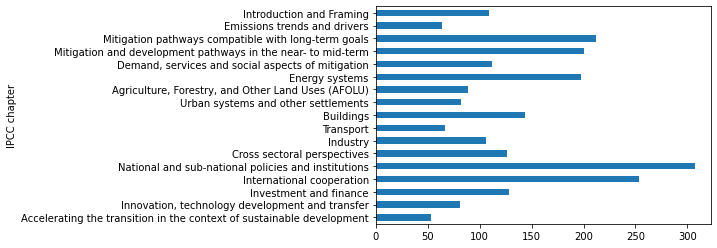

In [142]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
tmatch.groupby('IPCC chapter')['id'].nunique().plot.barh()
ax.set_yticklabels(chapter_titles)
ax.invert_yaxis()